In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as Datasets
import sklearn.model_selection as cv
from sklearn.neighbors import KNeighborsClassifier

In [16]:
def meanScaledCopy(ndarray):
    df_scaled = ndarray.copy()
    for i in range(df_scaled.shape[-1]):
        df_scaled[:,i] = (df_scaled[:,i]-df_scaled[:,i].mean())/df_scaled[:,i].std()
    return df_scaled

In [4]:
cancer = Datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data)

In [32]:
X = df.values
Y = cancer.target

In [36]:
X = meanScaledCopy(X)

In [37]:
X_test, X_train, Y_test, Y_train = cv.train_test_split(X,Y,test_size=0.25,random_state=0)

K for max score =  5
Max score is =  0.957746478873


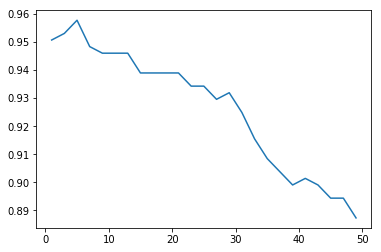

In [66]:
scores = []
neighbour_count = []
for i in range(1,50,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,Y_train)
    scores.append(clf.score(X_test,Y_test))
    neighbour_count.append(i)
plt.plot(neighbour_count,scores)
print("K for max score = ",neighbour_count[scores.index(max(scores))])
print("Max score is = ",max(scores))

# Own Implementation

In [60]:
def predictKNearest(X_train,Y_train,X_test,n_neighbour=5):
    Y_pred = np.zeros(len(X_test))
    for i in range(0,len(X_test)): #For each test sample
        distances = []
        for j in range(0,X_train.shape[0]): #Distance From each training sample
            d = ((X_test[i] - X_train[j])**2).sum()
            distances.append((d,j))
        distances.sort()
        votes = {}
        all_classes = set(Y_train)
        for j in all_classes:
            votes[j] = 0
        for j in range(0,n_neighbour):
            current_class = Y_train[distances[j][1]]
            votes[current_class] = votes[current_class] + 1
        Y_pred[i] = max(votes,key=votes.get)
    return Y_pred

K for max score =  5
Max score is =  0.957746478873


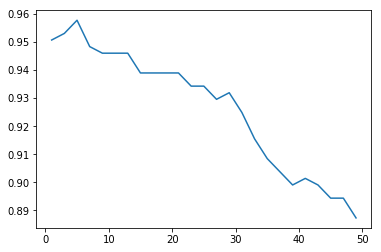

In [65]:
scores = []
neighbour_count = []
for i in range(1,50,2):
    Y_pred = predict(X_train,Y_train,X_test,i)
    score = ((Y_pred == Y_test).sum()/len(Y_test))
    scores.append(score)
    neighbour_count.append(i)
plt.plot(neighbour_count,scores)
print("K for max score = ",neighbour_count[scores.index(max(scores))])
print("Max score is = ",max(scores))